In [236]:
# import all packages that might be useful
import sys # to manipulate different part of python runtime environment
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima


In [237]:
df = pd.read_csv(r'ncdc_covid_data.csv')

In [238]:
df.head()

,Date,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
0,09/08/2021,197046,559,2578,5,185379,9089
1,09/07/2021,196487,597,2573,17,185159,8755
2,09/06/2021,195890,379,2556,4,184882,8452
3,09/05/2021,195511,459,2552,30,184530,8429
4,09/04/2021,195052,964,2522,27,182463,10067


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             19 non-null     object
 1   Confirmed cases  19 non-null     int64 
 2   New cases        19 non-null     int64 
 3   Total deaths     19 non-null     int64 
 4   New deaths       19 non-null     int64 
 5   Total recovery   19 non-null     int64 
 6   Active cases     19 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.0+ KB


In [240]:
#Make the date column be of date data type. It is of object data type by default
df['Date'] = pd.to_datetime(df['Date'])


In [241]:
df=df.set_index('Date')

In [242]:
df.head()

,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
Date,,,,,,
2021-09-08,197046,559,2578,5,185379,9089
2021-09-07,196487,597,2573,17,185159,8755
2021-09-06,195890,379,2556,4,184882,8452
2021-09-05,195511,459,2552,30,184530,8429
2021-09-04,195052,964,2522,27,182463,10067


In [243]:
df.tail()

,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
Date,,,,,,
2021-08-25,188880,637,2288,7,169382,17210
2021-08-24,188243,655,2281,5,169035,16927
2021-08-23,187588,565,2276,8,168818,16494
2021-08-22,187023,388,2268,8,168455,16300
2021-08-21,186635,1064,2260,13,168320,16055


In [244]:
df.shape

(19, 6)

In [245]:
#Check if there are missing values. The output shows ther are no missing values
df.isnull().sum()

Confirmed cases    0
New cases          0
Total deaths       0
New deaths         0
Total recovery     0
Active cases       0
dtype: int64

## ARIMA

### Our focus here is to forecast for New cases, New deaths and Total recovery. So, we will focus on these three variables.

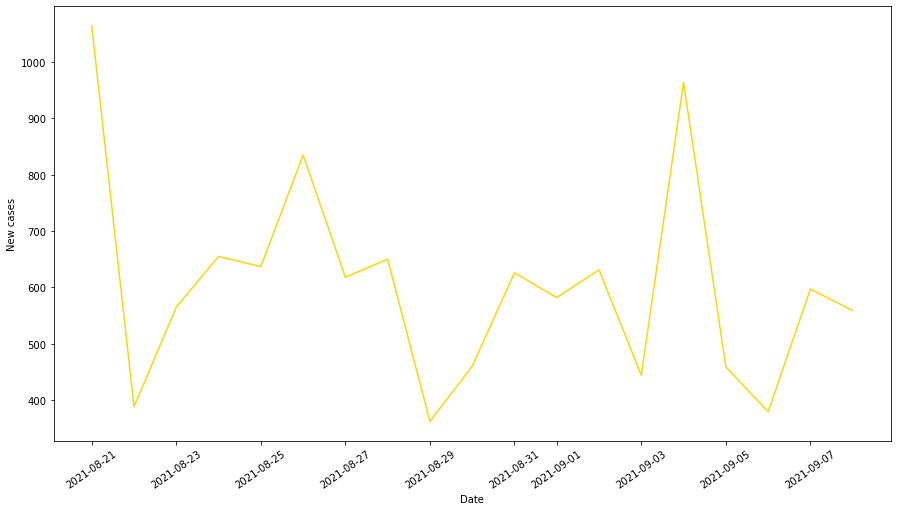

In [246]:
#Plot the variables to observes the trends present in them
sns.lineplot(df.index,df['New cases'],color='gold')
plt.xlabel('Date')
plt.xticks(rotation=35);

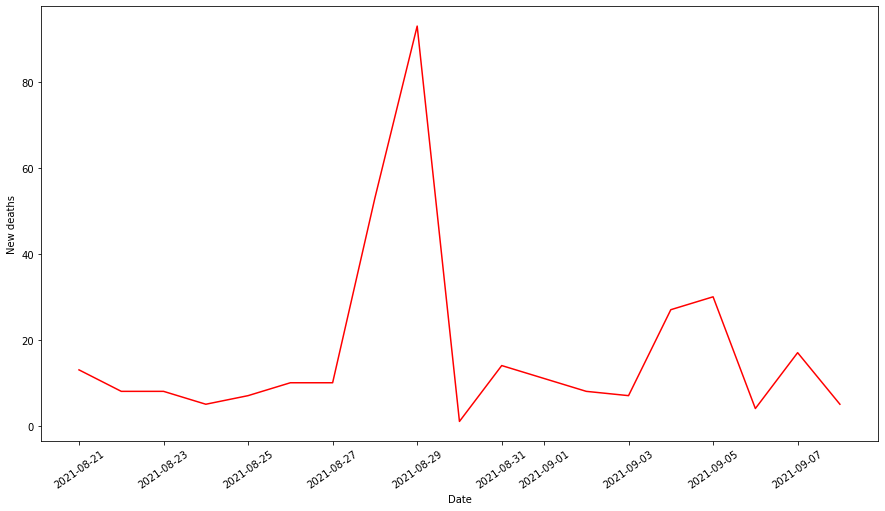

In [247]:
sns.lineplot(df.index,df['New deaths'],color='r')
plt.xlabel('Date')
plt.xticks(rotation=35);

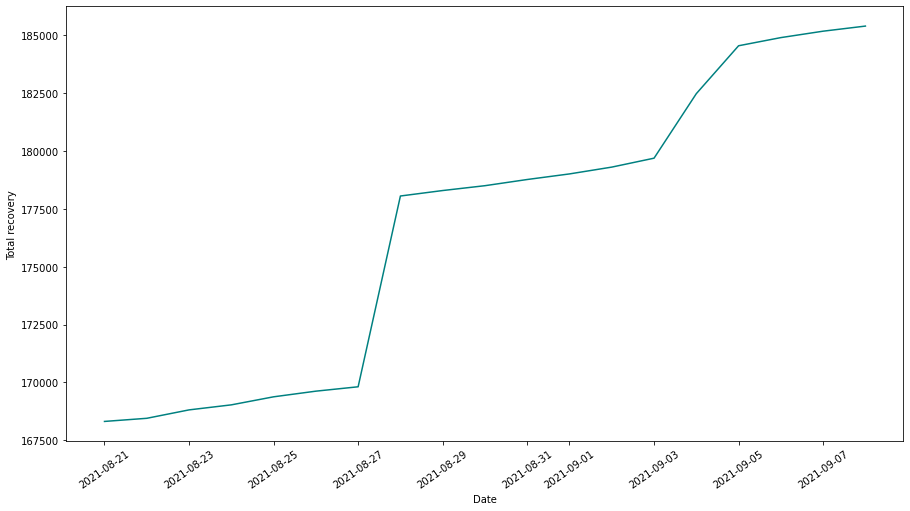

In [248]:
sns.lineplot(df.index,df['Total recovery'],color='teal')
plt.xlabel('Date')
plt.xticks(rotation=35);

## Perform ARIMA model for the variable - New cases

In [249]:
model_new_cases = auto_arima(df['New cases'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=258.999, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=253.180, Time=0.71 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=257.124, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=250.744, Time=0.91 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=251.530, Time=1.60 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=248.072, Time=2.42 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0] intercept
Total fit time: 14.422 seconds


In [250]:
print(model_new_cases.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(3, 2, 1)   Log Likelihood                -118.036
Date:                Mon, 13 Sep 2021   AIC                            248.072
Time:                        22:21:53   BIC                            253.072
Sample:                             0   HQIC                           248.569
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9268     18.359      0.105      0.916     -34.055      37.909
ar.L1         -0.8233      0.551     -1.495      0.135      -1.902       0.256
ar.L2         -0.5421      0.517     -1.049      0.2

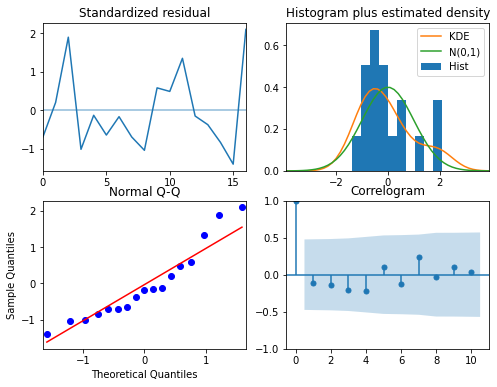

In [251]:
#Diagnostic plot for the new cases ARIMA model conducted
model_new_cases.plot_diagnostics(figsize=(8,6))
plt.show()

In [252]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_new_cases= model_new_cases.predict(n_periods=n_periods)
forecast_new_cases= pd.DataFrame(forecast_new_cases,index=df.index,columns=['New_cases_prediction'])

In [253]:
forecast_new_cases

,New_cases_prediction
Date,
2021-09-08,667.732197
2021-09-07,710.354280
2021-09-06,812.795814
2021-09-05,833.658207
2021-09-04,807.826132
2021-09-03,855.227396
2021-09-02,885.066965
2021-09-01,900.462629
2021-08-31,925.287630


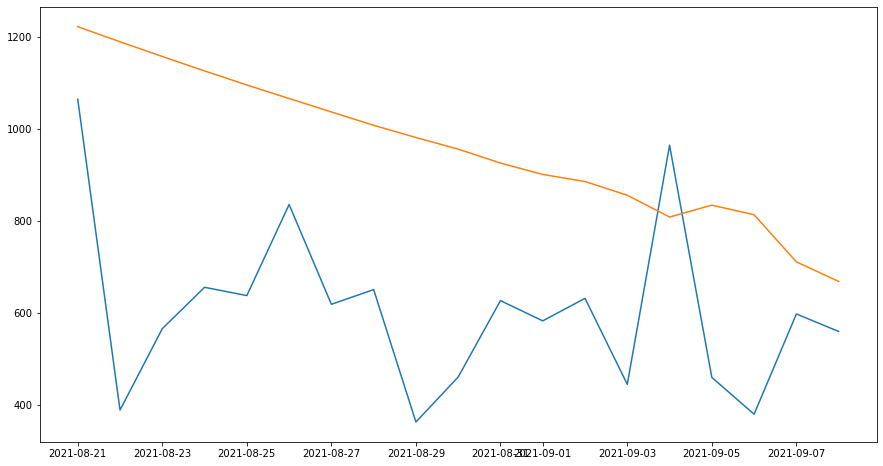

In [254]:
#Plot the prediction
plt.plot(df['New cases'], label='New cases')
plt.plot(forecast_new_cases,label='forecast for New cases')
plt.show()

## Performance Evaluation for new cases

In [255]:
mse_new_cases= mean_squared_error(df['New deaths'],forecast_new_cases)
rmse_new_cases= np.sqrt(mean_squared_error(df['New deaths'],forecast_new_cases))
mae_new_cases= mean_absolute_error(df['New deaths'],forecast_new_cases)

In [256]:
arima_accuracy_results_new_cases=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_new_cases],'RMSE':[rmse_new_cases],'MAE':[mae_new_cases]})
arima_accuracy_results_new_cases = arima_accuracy_results_new_cases[['Method','MSE','RMSE','MAE']]
arima_accuracy_results_new_cases

,Method,MSE,RMSE,MAE
0,ARIMA,912256.506215,955.1212,942.167244


## Perform ARIMA model for the variable - New deaths

In [257]:
model_new_deaths = auto_arima(df['New deaths'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=181.633, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=178.798, Time=0.48 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=179.635, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=176.053, Time=0.78 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=176.466, Time=0.85 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=174.057, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=176.798, Time=0.31 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=174.474, Time=0.58 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec

Best mode

In [258]:
print(model_new_deaths.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -84.028
Date:                Mon, 13 Sep 2021   AIC                            174.057
Time:                        22:22:14   BIC                            176.556
Sample:                             0   HQIC                           174.305
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7315      0.186     -3.935      0.000      -1.096      -0.367
ar.L2         -0.4756      0.278     -1.708      0.088      -1.021       0.070
sigma2      1097.9924    315.811      3.477      0.0

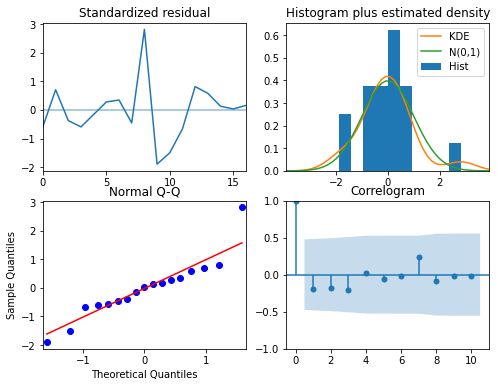

In [259]:
#Diagnostic plot for the new cases ARIMA model conducted
model_new_deaths.plot_diagnostics(figsize=(8,6))
plt.show()

In [260]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_new_deaths= model_new_deaths.predict(n_periods=n_periods)
forecast_new_deaths= pd.DataFrame(forecast_new_deaths,index=df.index,columns=['New_deaths_prediction'])

In [261]:
forecast_new_deaths

,New_deaths_prediction
Date,
2021-09-08,15.769213
2021-09-07,17.792319
2021-09-06,21.422153
2021-09-05,24.231489
2021-09-04,26.876883
2021-09-03,30.032424
2021-09-02,32.892755
2021-09-01,35.726415
2021-08-31,38.719984


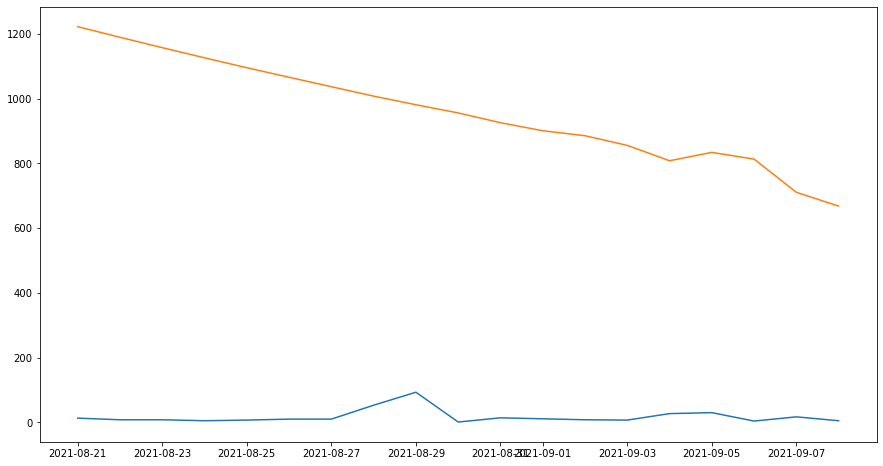

In [262]:
#Plot the prediction
plt.plot(df['New deaths'], label='New deaths')
plt.plot(forecast_new_cases,label='forecast for New deaths')
plt.show()

## Performance Evaluation for new deaths

In [263]:
mse_new_deaths= mean_squared_error(df['New deaths'],forecast_new_deaths)
rmse_new_deaths= np.sqrt(mean_squared_error(df['New deaths'],forecast_new_deaths))
mae_deaths= mean_absolute_error(df['New deaths'],forecast_new_deaths)

In [264]:
arima_accuracy_results_new_deaths=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_results_new_deaths],'RMSE':[rmse_results_new_deaths],'MAE':[mae_results_new_deaths]})
arima_accuracy_results_new_deaths = arima_accuracy_results_new_deaths[['Method','MSE','RMSE','MAE']]
arima_accuracy_results_new_deaths

,Method,MSE,RMSE,MAE
0,ARIMA,1308.093472,36.167575,30.497063


## Perform ARIMA model for the variable - Total recovery

In [265]:
model_total_recovery = auto_arima(df['Total recovery'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=322.702, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=325.001, Time=0.29 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=325.263, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=320.703, Time=0.14 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.482 seconds


In [266]:
print(model_total_recovery.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -159.352
Date:                Mon, 13 Sep 2021   AIC                            320.703
Time:                        22:22:44   BIC                            321.536
Sample:                             0   HQIC                           320.786
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.02e+06   1.52e+06      5.288      0.000    5.05e+06     1.1e+07
Ljung-Box (L1) (Q):                   4.44   Jarque-Bera (JB):                13.88
Prob(Q):                              0.04   Pr

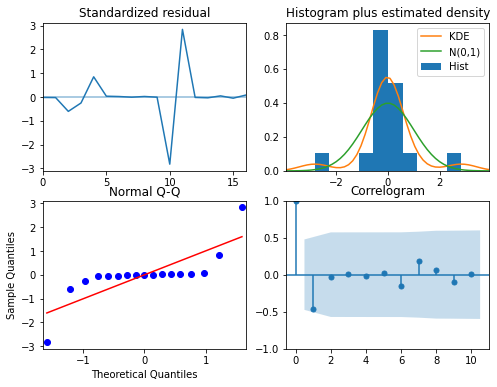

In [267]:
#Diagnostic plot for the new cases ARIMA model conducted
model_total_recovery.plot_diagnostics(figsize=(8,6))
plt.show()

In [268]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_total_recovery= model_total_recovery.predict(n_periods=n_periods)
forecast_total_recovery= pd.DataFrame(forecast_total_recovery,index=df.index,columns=['Total_recovery_prediction'])

In [269]:
forecast_total_recovery

,Total_recovery_prediction
Date,
2021-09-08,168185.0
2021-09-07,168050.0
2021-09-06,167915.0
2021-09-05,167780.0
2021-09-04,167645.0
2021-09-03,167510.0
2021-09-02,167375.0
2021-09-01,167240.0
2021-08-31,167105.0


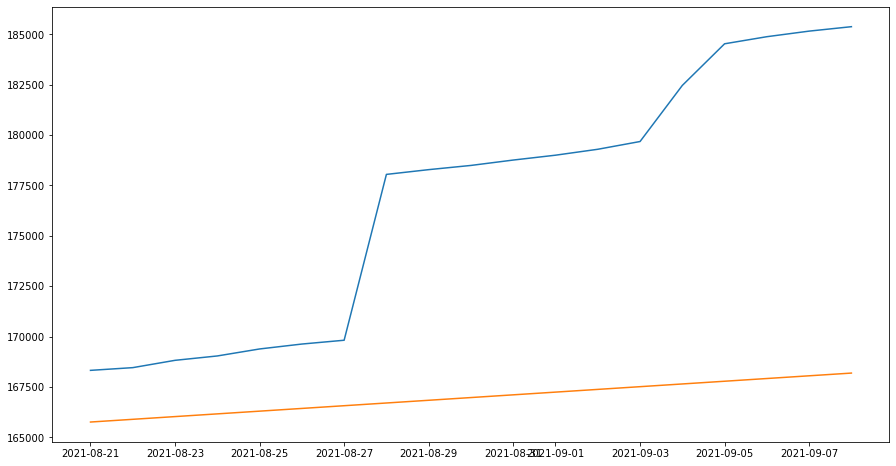

In [270]:
#Plot the prediction
plt.plot(df['Total recovery'], label='Total recovery')
plt.plot(forecast_total_recovery,label='forecast for Total recovery')
plt.show()

## Performance Evaluation for total recovery

In [271]:
mse_total_recovery= mean_squared_error(df['New deaths'],forecast_total_recovery)
rmse_total_recovery= np.sqrt(mean_squared_error(df['New deaths'],forecast_total_recovery))
mae_total_recovery= mean_absolute_error(df['New deaths'],forecast_total_recovery)

In [272]:
arima_accuracy_results_total_recovery=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_total_recovery],'RMSE':[rmse_total_recovery],'MAE':[mae_total_recovery]})
arima_accuracy_results_total_recovery = arima_accuracy_results_total_recovery[['Method','MSE','RMSE','MAE']]
arima_accuracy_results_total_recovery

,Method,MSE,RMSE,MAE
0,ARIMA,2.787371e+10,166954.215999,166952.578947


## SARIMA

## Perform SARIMA model for the variable - New cases

In [273]:
smodel_new_cases = auto_arima(df['New cases'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=257.124, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.378, Time=0.41 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=248.960, Time=0.79 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=249.620, Time=0.74 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=250.744, Time=0.50 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 5.601 seconds


In [274]:
print(smodel_new_cases.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -121.480
Date:                Mon, 13 Sep 2021   AIC                            248.960
Time:                        22:23:24   BIC                            251.460
Sample:                             0   HQIC                           249.209
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0477      0.294     -3.562      0.000      -1.624      -0.471
ar.L2         -0.5420      0.358     -1.515      0.130      -1.243       0.159
sigma2      8.811e+04   3.48e+04      2.528      0.0

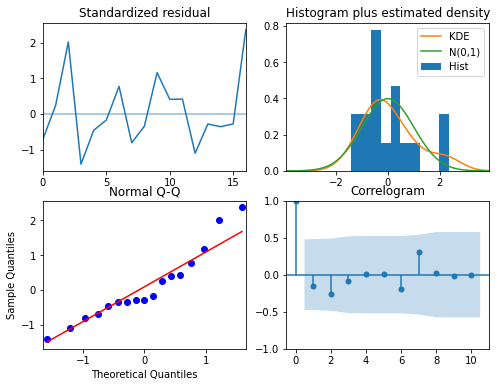

In [275]:
#Diagnostic plot for the new cases ARIMA model conducted
smodel_new_cases.plot_diagnostics(figsize=(8,6))
plt.show()

In [276]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_new_cases= smodel_new_cases.predict(n_periods=n_periods)
forecast_new_cases= pd.DataFrame(forecast_new_cases,index=df.index,columns=['New_cases_prediction'])

In [277]:
forecast_new_cases

,New_cases_prediction
Date,
2021-09-08,893.445901
2021-09-07,1147.539549
2021-09-06,1415.532033
2021-09-05,1438.813956
2021-09-04,1710.951426
2021-09-03,1854.984744
2021-09-02,1998.361975
2021-09-01,2211.855849
2021-08-31,2352.242634


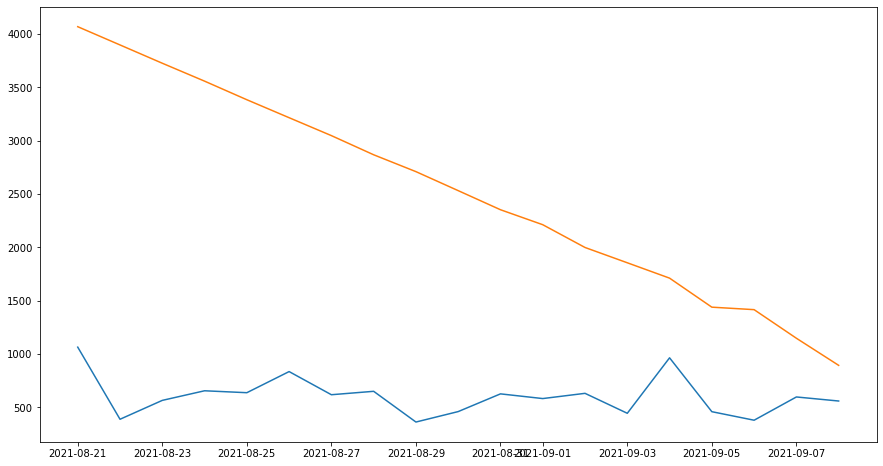

In [278]:
#Plot the prediction
plt.plot(df['New cases'], label='New cases')
plt.plot(forecast_new_cases,label='forecast for New cases')
plt.show()

## Performance Evaluation for new cases

In [279]:
mse_new_cases= mean_squared_error(df['New deaths'],forecast_new_cases)
rmse_new_cases= np.sqrt(mean_squared_error(df['New deaths'],forecast_new_cases))
mae_new_cases= mean_absolute_error(df['New deaths'],forecast_new_cases)

In [280]:
sarima_accuracy_results_new_cases=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_new_cases],'RMSE':[rmse_new_cases],'MAE':[mae_new_cases]})
sarima_accuracy_results_new_cases = sarima_accuracy_results_new_cases[['Method','MSE','RMSE','MAE']]
sarima_accuracy_results_new_cases

,Method,MSE,RMSE,MAE
0,ARIMA,7.191893e+06,2681.770519,2510.266717


## Perform ARIMA model for the variable - New deaths

In [281]:
smodel_new_deaths = auto_arima(df['New deaths'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=179.635, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=176.798, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=174.057, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=174.474, Time=0.58 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=176.053, Time=0.63 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 4.338 seconds


In [282]:
print(smodel_new_deaths.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -84.028
Date:                Mon, 13 Sep 2021   AIC                            174.057
Time:                        22:24:01   BIC                            176.556
Sample:                             0   HQIC                           174.305
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7315      0.186     -3.935      0.000      -1.096      -0.367
ar.L2         -0.4756      0.278     -1.708      0.088      -1.021       0.070
sigma2      1097.9924    315.811      3.477      0.0

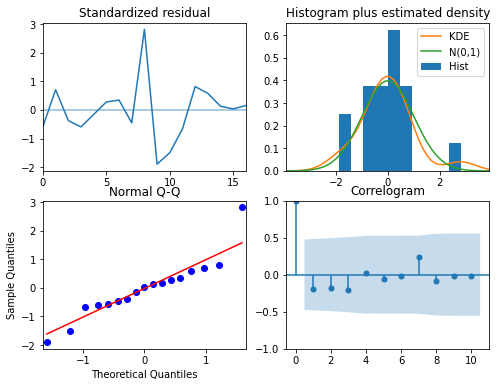

In [283]:
#Diagnostic plot for the new cases ARIMA model conducted
smodel_new_deaths.plot_diagnostics(figsize=(8,6))
plt.show()

In [284]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_new_deaths= smodel_new_deaths.predict(n_periods=n_periods)
forecast_new_deaths= pd.DataFrame(forecast_new_deaths,index=df.index,columns=['New_deaths_prediction'])

In [285]:
forecast_new_deaths

,New_deaths_prediction
Date,
2021-09-08,15.769213
2021-09-07,17.792319
2021-09-06,21.422153
2021-09-05,24.231489
2021-09-04,26.876883
2021-09-03,30.032424
2021-09-02,32.892755
2021-09-01,35.726415
2021-08-31,38.719984


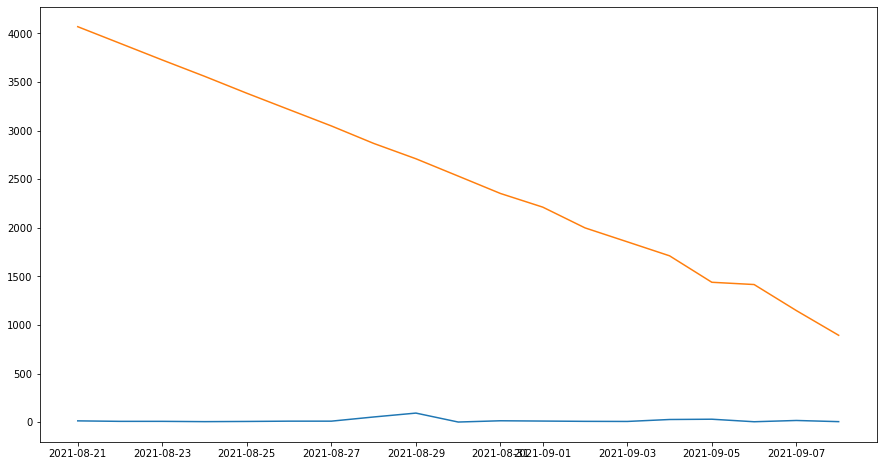

In [286]:
#Plot the prediction
plt.plot(df['New deaths'], label='New deaths')
plt.plot(forecast_new_cases,label='forecast for New deaths')
plt.show()

## Performance Evaluation for new deaths

In [287]:
mse_new_deaths= mean_squared_error(df['New deaths'],forecast_new_deaths)
rmse_new_deaths= np.sqrt(mean_squared_error(df['New deaths'],forecast_new_deaths))
mae_deaths= mean_absolute_error(df['New deaths'],forecast_new_deaths)

In [288]:
sarima_accuracy_results_new_deaths=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_results_new_deaths],'RMSE':[rmse_results_new_deaths],'MAE':[mae_results_new_deaths]})
sarima_accuracy_results_new_deaths = sarima_accuracy_results_new_deaths[['Method','MSE','RMSE','MAE']]
sarima_accuracy_results_new_deaths

,Method,MSE,RMSE,MAE
0,ARIMA,1308.093472,36.167575,30.497063


## Perform SARIMA model for the variable - Total recovery

In [289]:
smodel_total_recovery = auto_arima(df['Total recovery'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=320.703, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=323.001, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=323.159, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=322.702, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.954 seconds


In [290]:
print(smodel_total_recovery.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -159.352
Date:                Mon, 13 Sep 2021   AIC                            320.703
Time:                        22:24:31   BIC                            321.536
Sample:                             0   HQIC                           320.786
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.02e+06   1.52e+06      5.288      0.000    5.05e+06     1.1e+07
Ljung-Box (L1) (Q):                   4.44   Jarque-Bera (JB):                13.88
Prob(Q):                              0.04   Pr

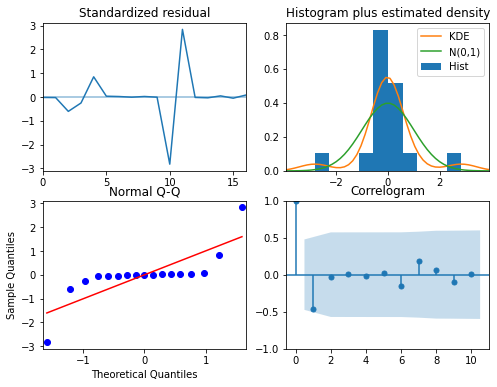

In [291]:
#Diagnostic plot for the new cases ARIMA model conducted
smodel_total_recovery.plot_diagnostics(figsize=(8,6))
plt.show()

In [292]:
#Forecast the new cases for the next 19 days
n_periods=19
forecast_total_recovery= smodel_total_recovery.predict(n_periods=n_periods)
forecast_total_recovery= pd.DataFrame(forecast_total_recovery,index=df.index,columns=['Total_recovery_prediction'])

In [293]:
forecast_total_recovery

,Total_recovery_prediction
Date,
2021-09-08,168185.0
2021-09-07,168050.0
2021-09-06,167915.0
2021-09-05,167780.0
2021-09-04,167645.0
2021-09-03,167510.0
2021-09-02,167375.0
2021-09-01,167240.0
2021-08-31,167105.0


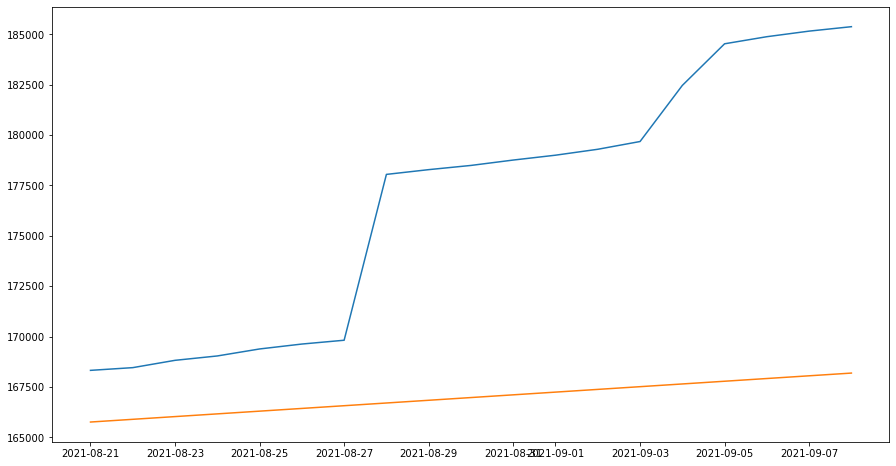

In [294]:
#Plot the prediction
plt.plot(df['Total recovery'], label='Total recovery')
plt.plot(forecast_total_recovery,label='forecast for Total recovery')
plt.show()

## Performance Evaluation for total recovery

In [295]:
mse_total_recovery= mean_squared_error(df['New deaths'],forecast_total_recovery)
rmse_total_recovery= np.sqrt(mean_squared_error(df['New deaths'],forecast_total_recovery))
mae_total_recovery= mean_absolute_error(df['New deaths'],forecast_total_recovery)

In [296]:
sarima_accuracy_results_total_recovery=pd.DataFrame({'Method':['ARIMA'],'MSE':[mse_total_recovery],'RMSE':[rmse_total_recovery],'MAE':[mae_total_recovery]})
sarima_accuracy_results_total_recovery = sarima_accuracy_results_total_recovery[['Method','MSE','RMSE','MAE']]
sarima_accuracy_results_total_recovery

,Method,MSE,RMSE,MAE
0,ARIMA,2.787371e+10,166954.215999,166952.578947
